# Fault Detection in Electric Power System using Machine Learning

Fault detection in electric power systems is a critical task that ensures the reliability and safety of the power grid. Machine learning algorithms can be used to analyze large amounts of data collected from sensors and other sources to identify potential faults before they lead to outages or other problems.

## Types of Faults in Power System
> 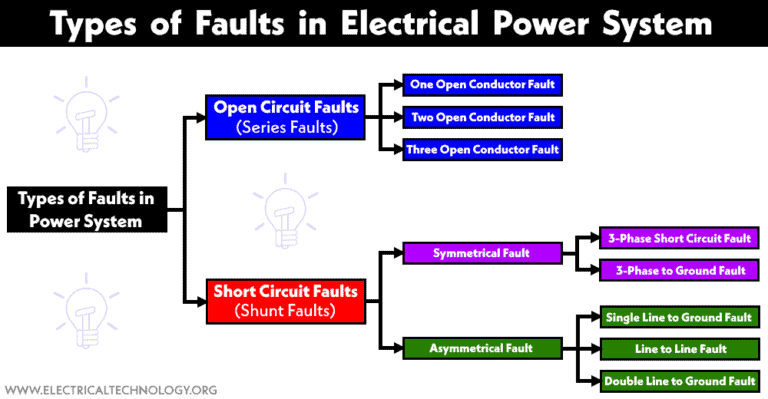

## Understanding the Faults and their terms in the Dataset

Inputs - [Ia,Ib,Ic,Va,Vb,Vc]

Outputs - [G C B A]

Examples :

[0 0 0 0] - No Fault

[1 0 0 1] - LG fault (Between Phase A and Gnd)

[0 0 1 1] - LL fault (Between Phase A and Phase B)

[1 0 1 1] - LLG Fault (Between Phases A,B and ground)

[0 1 1 1] - LLL Fault(Between all three phases)

[1 1 1 1] - LLLG fault( Three phase symmetrical fault)


Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

import warnings

# Filter out all warnings
warnings.filterwarnings("ignore")


In [ ]:
# importing the Data
df1=pd.read_csv('classData.csv')
df2=pd.read_csv('detect_dataset.csv')

In [ ]:
df1.sample(10)

G  C  B  A          Ia          Ib          Ic        Va        Vb  \
6711  0  0  0  0  -28.154613   -8.776529   33.728820  0.509232 -0.506819   
4651  1  1  1  1  613.114033  244.188906 -857.303365  0.040678 -0.030586   
1732  1  0  1  1  751.455259 -778.962495  -16.876263 -0.002039 -0.134791   
1785  1  0  1  1  831.884646 -205.975248   29.516507  0.029917 -0.350757   
6054  0  0  0  0   50.299181   25.509769  -79.219930 -0.102147  0.584259   
691   1  0  0  1  576.030662   -1.541882   38.811812  0.246700 -0.566526   
1939  1  0  1  1 -795.265727  726.978696   10.710082 -0.002626  0.172568   
4590  1  1  1  1  875.014792 -556.525711 -318.484129  0.013832 -0.041651   
1850  1  0  1  1  213.816019  630.529968   57.777312  0.041189 -0.300012   
6867  0  0  0  0   45.210059   35.725344  -84.090074 -0.220819  0.616348   

            Vc  
6711 -0.002413  
4651 -0.010091  
1732  0.136829  
1785  0.320840  
6054 -0.482113  
691   0.319826  
1939 -0.169942  
4590  0.027819  
1850  0.258823  
6867 -0.395529

In [ ]:
df2.sample(10)

Output (S)          Ia          Ib          Ic        Va        Vb  \
901             1 -713.642184  -70.312739   27.619073  0.268127 -0.160635   
11667           0  -11.898371  -21.710890   30.648471  0.570020 -0.417281   
9532            1  868.128729 -540.860272  -45.911392  0.014908 -0.220855   
3935            0  -60.792592   66.334569   -2.708085 -0.432335 -0.155894   
10819           0  -54.803205   19.298071   32.292948  0.296934 -0.585909   
9029            1 -148.802722 -680.088701  828.889167 -0.040321  0.008888   
10962           0   54.377612   -5.913648  -51.632307  0.198557  0.405299   
1921            0  -48.565392   61.284157  -16.468483 -0.511523 -0.027766   
4587            1   54.507482 -595.052880  543.262468  0.228694  0.027381   
5278            1    0.368747  632.396037 -630.172101  0.409288  0.022490   

             Vc  Unnamed: 7  Unnamed: 8  
901   -0.107493         NaN         NaN  
11667 -0.152740         NaN         NaN  
9532   0.205947         NaN         NaN  
3935   0.588229         NaN         NaN  
10819  0.288975         NaN         NaN  
9029   0.031433         NaN         NaN  
10962 -0.603856         NaN         NaN  
1921   0.539289         NaN         NaN  
4587  -0.256075         NaN         NaN  
5278  -0.431778         NaN         NaN

## Defining electrical faults categories
Here, dependent variable is different types of electrical faults. Combining data from columns 'G', 'C', 'B' and 'A', we define following classes of possible states of electrical transmission lines.

'0000': 'No Fault',

'1000': 'Single Line to Ground A',

'0100': 'Single Line to Ground B',

'0010': 'Single Line to Ground C',

'0011': 'Line-to-Line BC',

'0101': 'Line-to-Line AC',

'1001': 'Line-to-Line AB',

'1010': 'Line-to-Line with Ground AB',

'0101': 'Line-to-Line with Ground AC',

'0110': 'Line-to-Line with Ground BC',

'0111': 'Three-Phase',

'1111': 'Three-Phase with Ground',

'1011': 'Line A Line B to Ground Faul

The Data is preprossed and we dont need to do any preprosessing or feature engineering.

In [ ]:
# dropping the features as they dont contribute to the analysis

df2.drop(['Unnamed: 7','Unnamed: 8'],axis=1,inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 656.4 KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [ ]:
df1.isna().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

In [ ]:
df2.isna().sum()

Output (S)    0
Ia            0
Ib            0
Ic            0
Va            0
Vb            0
Vc            0
dtype: int64

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df2.duplicated().sum()

0

## EDA

We will be using Dataprep library for Auto EDA

In [ ]:
!pip install dataprep

DataPrep Report
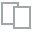
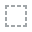
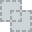
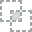
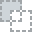
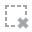
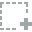
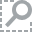
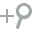
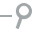
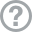
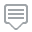
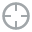
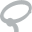
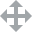
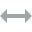
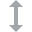
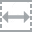
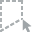
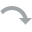
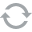
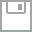
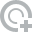
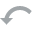
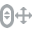
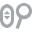
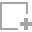
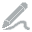
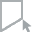
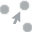
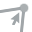
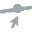

In [ ]:
from dataprep.eda import create_report
create_report(df2)

### Univariate Analysis

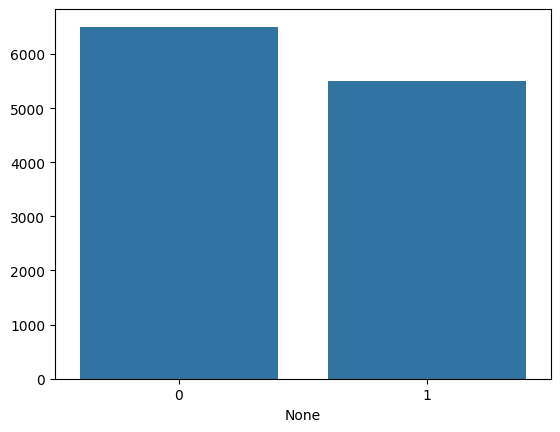

In [ ]:
output_counts = df2['Output (S)'].value_counts()
# Create the bar plot using the value counts for the y-axis
sns.barplot(x=output_counts.index, y=output_counts.values)
plt.show()

In [ ]:
df1

G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0     1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1     1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2     1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3     1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4     1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   
...  .. .. .. ..         ...         ...         ...       ...       ...   
7856  0  0  0  0  -66.237921   38.457041   24.912239  0.094421 -0.552019   
7857  0  0  0  0  -65.849493   37.465454   25.515675  0.103778 -0.555186   
7858  0  0  0  0  -65.446698   36.472055   26.106554  0.113107 -0.558211   
7859  0  0  0  0  -65.029633   35.477088   26.684731  0.122404 -0.561094   
7860  0  0  0  0  -64.598401   34.480799   27.250065  0.131669 -0.563835   

            Vc  
0    -0.267815  
1    -0.189099  
2    -0.151428  
3    -0.130570  
4    -0.113983  
...        ...  
7856  0.457598  
7857  0.451407  
7858  0.445104  
7859  0.438690  
7860  0.432166  

[7861 rows x 10 columns]

In [ ]:
# Converting the fault indicator columns to a single label representing the type of fault
df1['Fault_Type'] = df1[['G', 'C', 'B', 'A']].astype(str).agg(''.join, axis=1)

# Defining the fault types
fault_types = {
    '0000': 'No Fault',
    '1000': 'Single Line to Ground A',
    '0100': 'Single Line to Ground B',
    '0010': 'Single Line to Ground C',
    '0011': 'Line-to-Line BC',
    '0101': 'Line-to-Line AC',
    '1001': 'Line-to-Line AB',
    '1010': 'Line-to-Line with Ground AB',
    '0110': 'Line-to-Line with Ground BC',
    '0111': 'Three-Phase',
    '1111': 'Three-Phase with Ground',
    '1011': 'Line A Line B to Ground Fault'
}

# Mapping fault type codes to fault type names
df1['Fault_Type'] = df1['Fault_Type'].map(fault_types)

# Counting the occurrences of each fault type
fault_type_counts = df1['Fault_Type'].value_counts()
fault_type_counts

No Fault                         2365
Line A Line B to Ground Fault    1134
Three-Phase with Ground          1133
Line-to-Line AB                  1129
Three-Phase                      1096
Line-to-Line with Ground BC      1004
Name: Fault_Type, dtype: int64

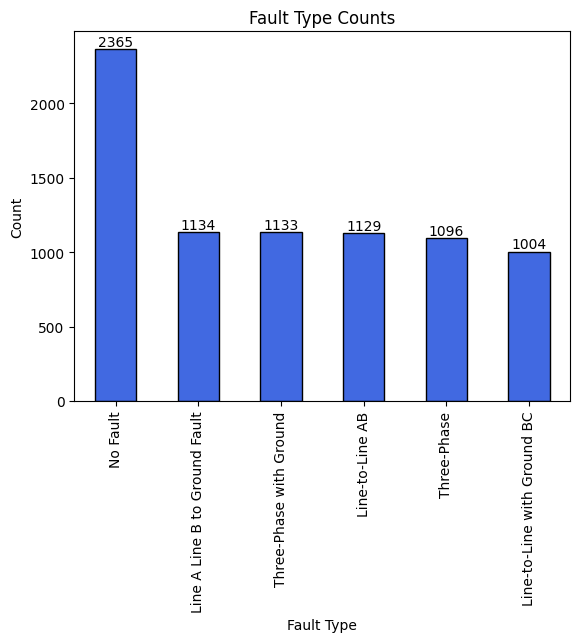

In [ ]:
import matplotlib.pyplot as plt

# Plot the bar chart
fault_type_counts.plot(kind='bar', color='royalblue', edgecolor='black')
plt.xlabel('Fault Type')
plt.ylabel('Count')
plt.title('Fault Type Counts')

# Add frequency on each bar
for i, value in enumerate(fault_type_counts):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:
print(df1['Fault_Type'].unique())


['Line-to-Line AB' 'Line A Line B to Ground Fault'
 'Line-to-Line with Ground BC' 'Three-Phase' 'Three-Phase with Ground'
 'No Fault']


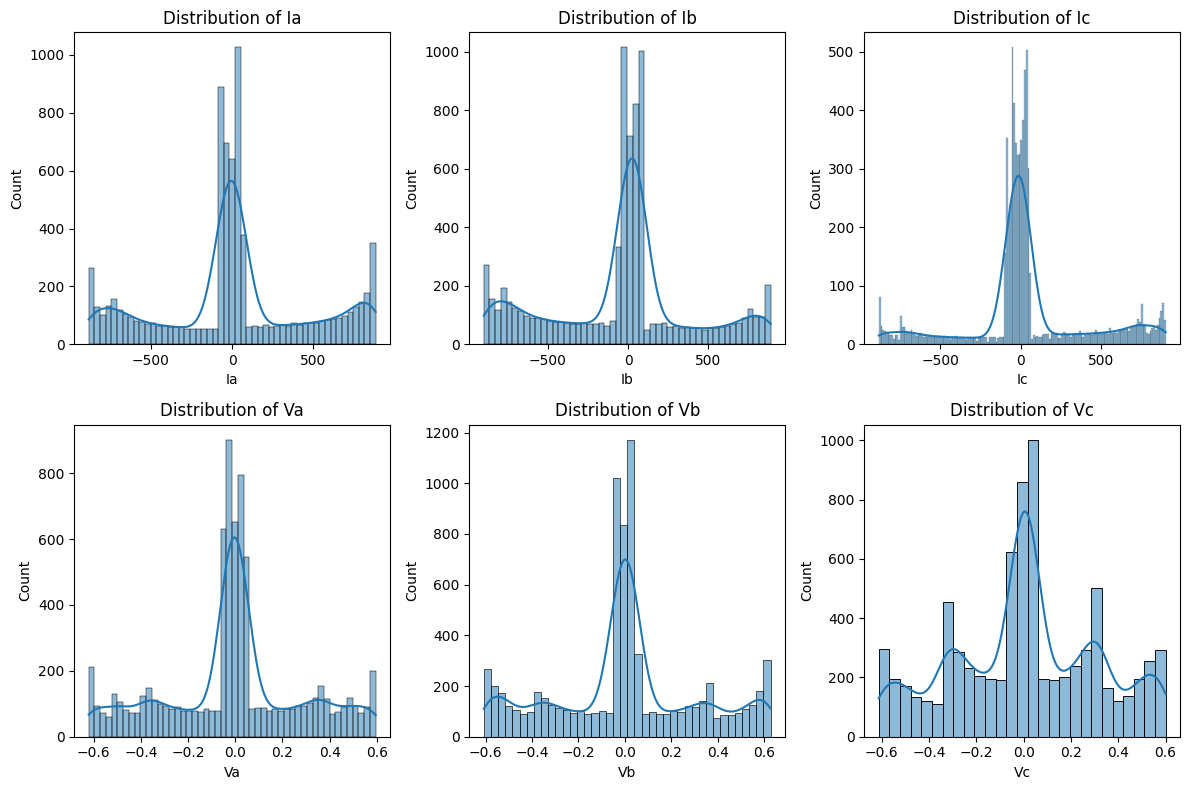

In [ ]:
features = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df1[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Current readings have wide and varied distributions, reflecting the impact of different fault conditions.

Voltage readings show more concentrated distributions around zero, indicating less variation compared to current readings.

all distribution peak around 0
Va, Vb, Vc also peak around 0.5 and -0.5

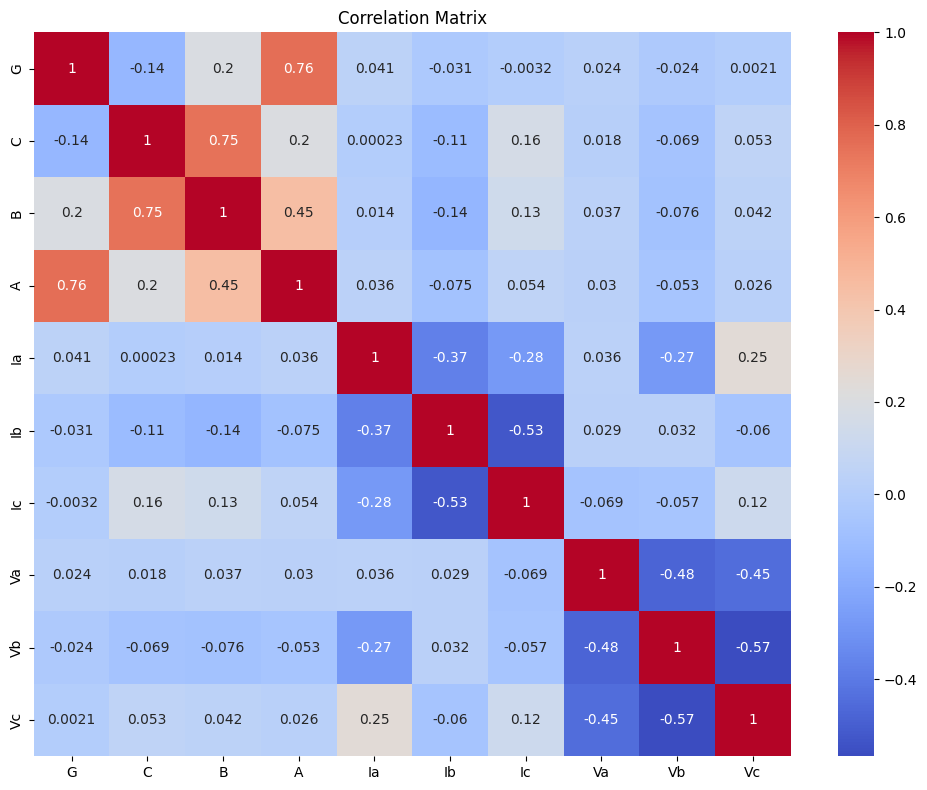

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Ia and Ib: Correlation coefficient is -0.374241, indicating a moderate negative correlation. As the current in line A (Ia) increases, the current in line B (Ib) tends to decrease, and vice versa.

Ib and Ic: Correlation coefficient is -0.528291, showing a stronger negative correlation than between Ia and Ib. This suggests that as Ib increases, Ic decreases more consistently.

Va, Vb, and Vc: These voltages show negative correlations with each other (e.g., Va and Vb have a correlation of -0.480247). This might be due to the nature of the electrical system where a rise in voltage in one line could be associated with a drop in another.

Ia and Vc: With a correlation coefficient of 0.246043, there is a weak positive correlation, suggesting that when the current in line A increases, the voltage in line C tends to slightly increase as well.

Ic and Vc: The correlation of 0.122919 is weak, indicating a slight positive relationship between the current in line C and the voltage in line C.

Overall, these correlations can give insights into how current and voltage variables interact in your electrical system, which is crucial for understanding and predicting faults.

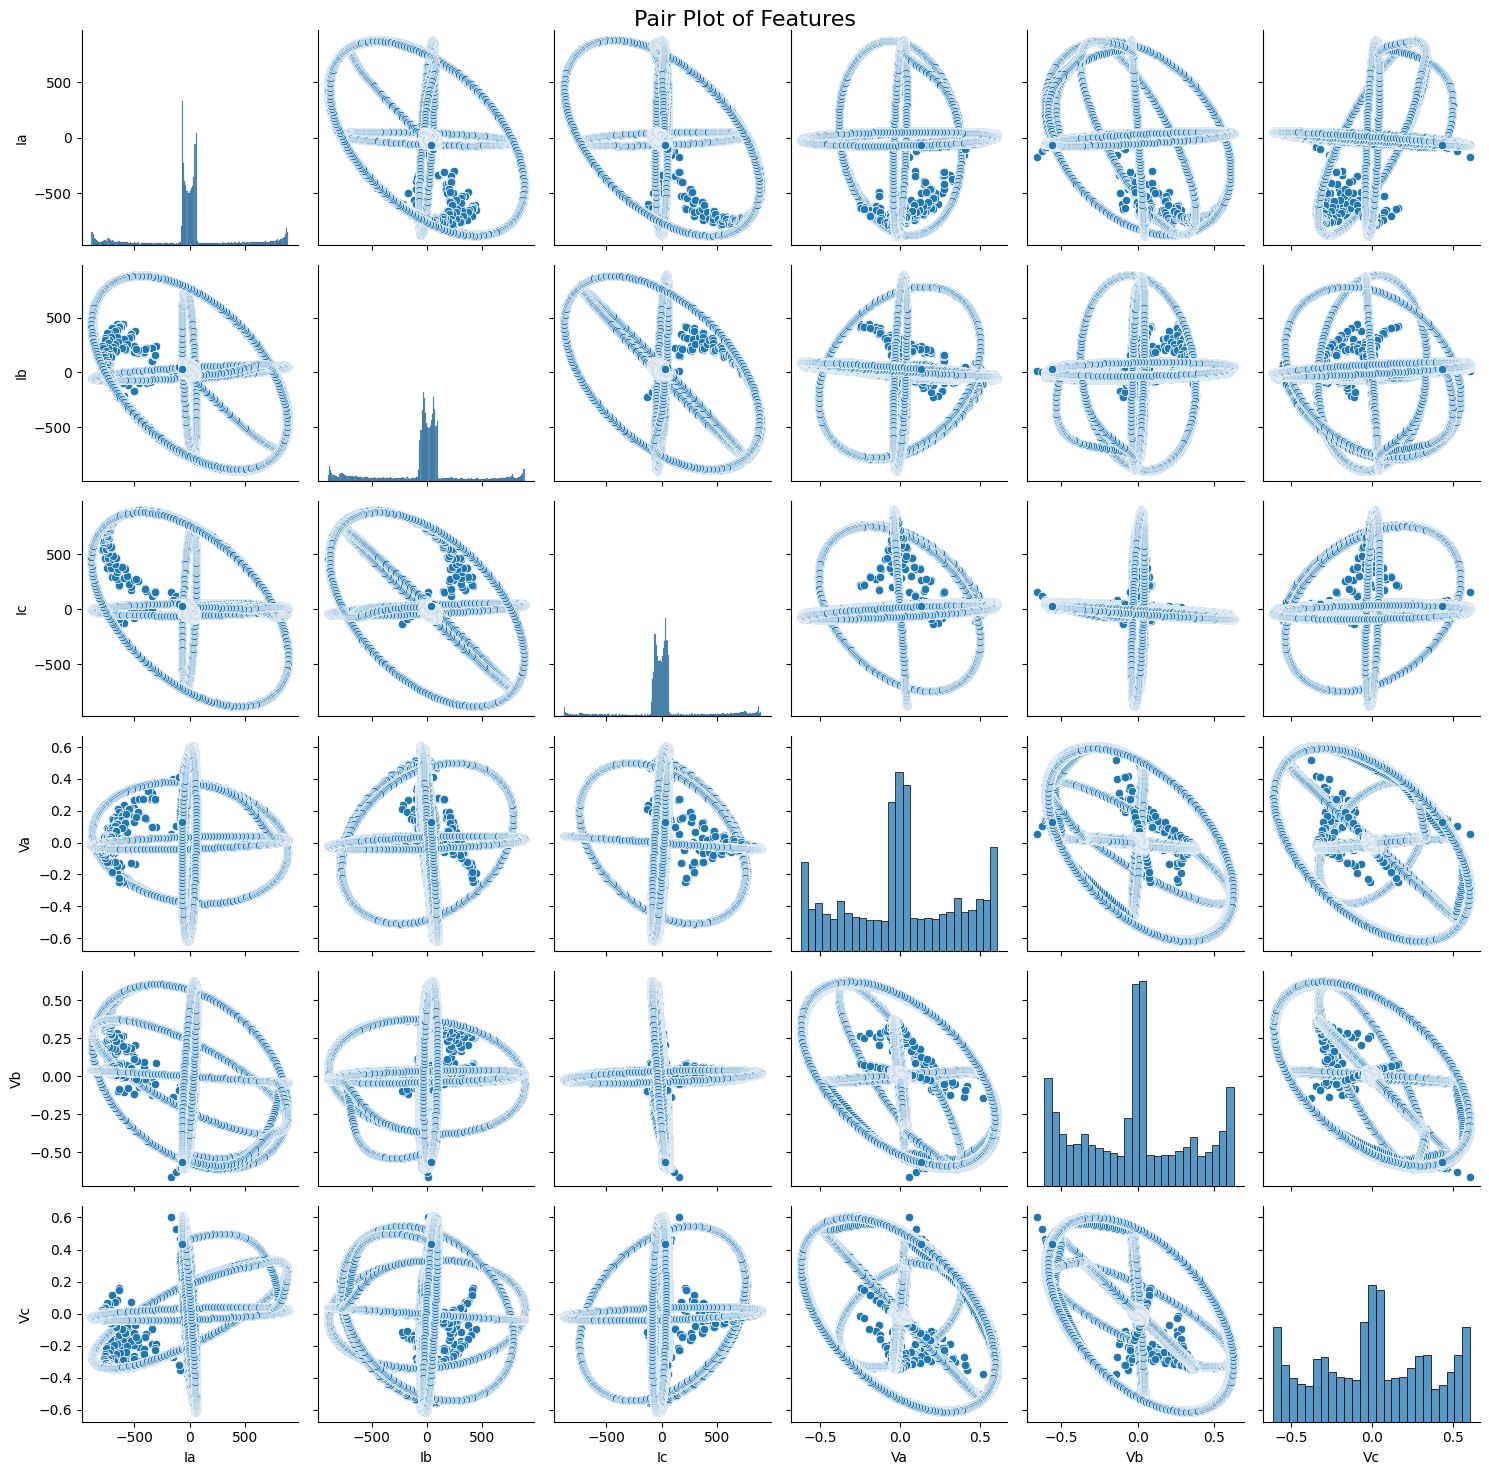

In [ ]:
pair_plot = sns.pairplot(data=df2.drop('Output (S)', axis=1))
pair_plot.fig.suptitle('Pair Plot of Features', fontsize=16)
pair_plot.fig.subplots_adjust(top=0.95)
plt.tight_layout()
plt.show()

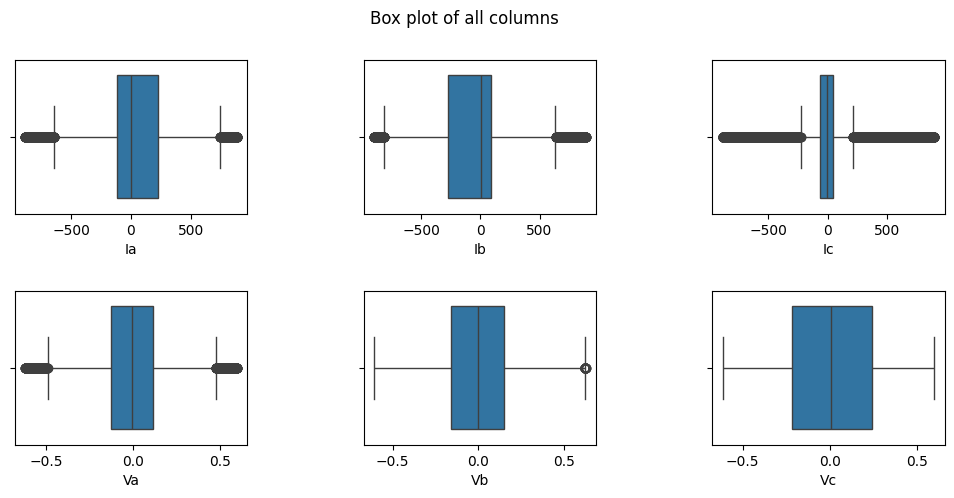

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(2):
    for j in range(3):
        plt.subplot(2, 3, i * 3 + (j + 1))
        sns.boxplot(x=df1[ls[i*3+j]])

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Box plot of all columns')
plt.show()

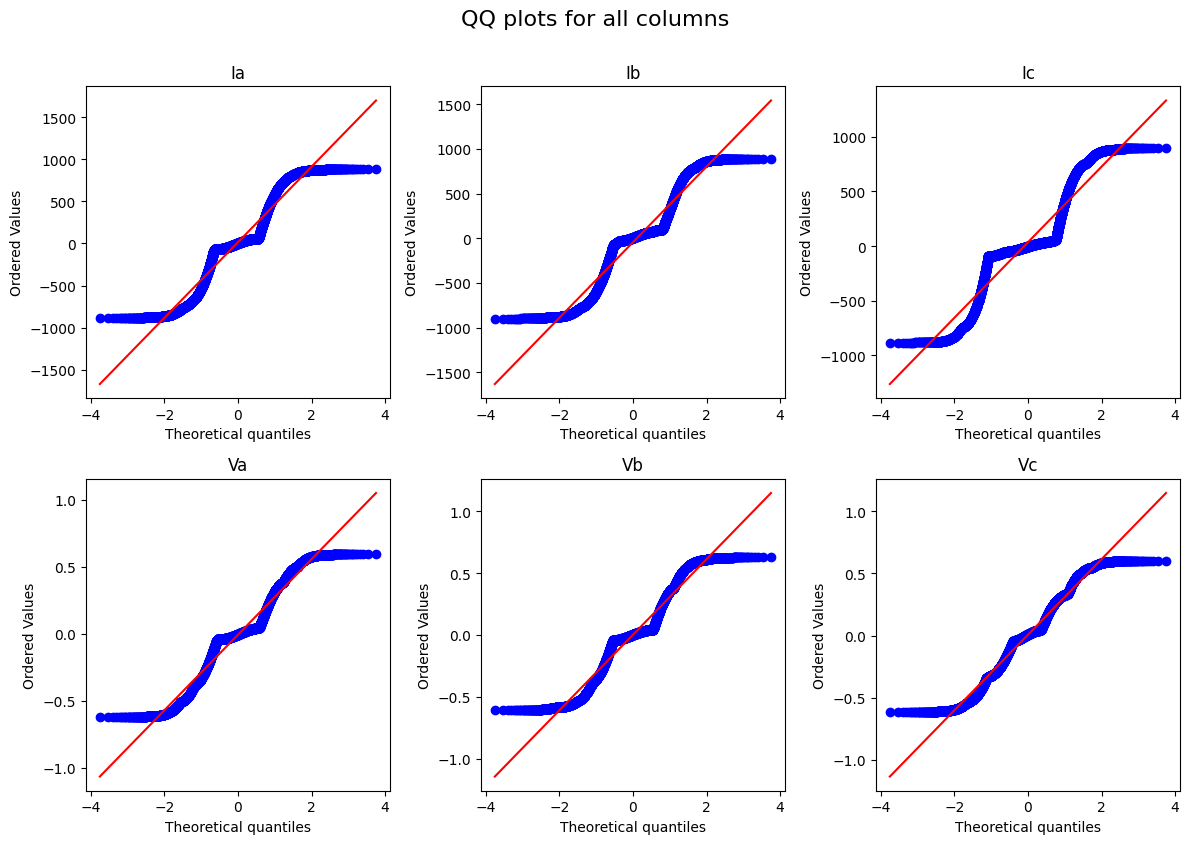

In [ ]:
plt.figure(figsize=(12, 8))

for i in range(2):
    for j in range(3):
        plt.subplot(2, 3, i * 3 + (j + 1))
        stats.probplot(df1[ls[i*3+j]], dist="norm", plot=plt)
        plt.title(ls[i*3+j])

plt.tight_layout()
plt.suptitle('QQ plots for all columns', y=1.05, fontsize=16)

plt.show()


data is too peaked in the middle


In [ ]:
# Normalization (using Min-Max Scaling as an example)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df1[features])

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder and transform the 'Fault_Type' to integer labels
y_encoded = label_encoder.fit_transform(df1['Fault_Type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6288, 6), (1573, 6), (6288,), (1573,))

In [ ]:
# Define a dictionary to store the cross-validation metrics of the algorithms
cv_metrics = {'Model': [], 'Accuracy': []}
test_metrics = {'Model': [], 'Accuracy': []}

# Define a function to train and evaluate each algorithm
def train_and_evaluate_model(model, model_name, X_train, y_train):
    # Define the scoring metrics for multi-class classification
    scoring = {
        'accuracy': make_scorer(accuracy_score),

    }

    # Perform cross-validation using StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_validate(model, X_train, y_train, cv=skf, scoring=scoring)

    # Store the cross-validation metrics
    cv_metrics['Model'].append(model_name)
    cv_metrics['Accuracy'].append(scores['test_accuracy'].mean())
    print(f"{model_name}: Cross-validation metrics calculated")

    # Fit the model on the entire training set
    model.fit(X_train, y_train)
    return model

# Define a function to evaluate the model on the test set and store the metrics
def evaluate_on_test_set(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    test_metrics['Model'].append(model_name)
    test_metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    print(f"{model_name}: Test metrics calculated")

# Train and evaluate each algorithm
models = [
    (LogisticRegression(random_state=42, max_iter=1000), "Logistic Regression"),
    (SVC(random_state=42), "Support Vector Machines"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (DecisionTreeClassifier(random_state=42), "Decision Trees"),
    (RandomForestClassifier(random_state=42), "Random Forest"),
    (GradientBoostingClassifier(random_state=42), "Gradient Boosting"),
    (GaussianNB(), "Naive Bayes"),
    (AdaBoostClassifier(random_state=42), "AdaBoost"),
    (XGBClassifier(random_state=42), "XGBoost"),
    (LGBMClassifier(random_state=42), "LightGBM"),
    (CatBoostClassifier(random_state=42, verbose=0), "CatBoost")
]

# Train and evaluate each model
for model, model_name in models:
    fitted_model = train_and_evaluate_model(model, model_name, X_train, y_train)
    evaluate_on_test_set(fitted_model, model_name, X_test, y_test)

# Convert the dictionary of cross-validation metrics to a DataFrame
import pandas as pd
cv_metrics_df = pd.DataFrame(cv_metrics)
test_metrics_df = pd.DataFrame(test_metrics)
print("\nCross-validation Metrics:")
print(cv_metrics_df)
print("\nTest Metrics:")
print(test_metrics_df)

Logistic Regression: Cross-validation metrics calculated
Logistic Regression: Test metrics calculated
Support Vector Machines: Cross-validation metrics calculated
Support Vector Machines: Test metrics calculated
K-Nearest Neighbors: Cross-validation metrics calculated
K-Nearest Neighbors: Test metrics calculated
Decision Trees: Cross-validation metrics calculated
Decision Trees: Test metrics calculated
Random Forest: Cross-validation metrics calculated
Random Forest: Test metrics calculated
Gradient Boosting: Cross-validation metrics calculated
Gradient Boosting: Test metrics calculated
Naive Bayes: Cross-validation metrics calculated
Naive Bayes: Test metrics calculated
AdaBoost: Cross-validation metrics calculated
AdaBoost: Test metrics calculated
XGBoost: Cross-validation metrics calculated
XGBoost: Test metrics calculated
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [ ]:
# Define the original features
features = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

# Feature Engineering: Creating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df1[features])

# Creating a DataFrame with the new polynomial features
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(features))

Consistency with Cross-validation: Most models maintain a similar ranking in performance on the test set as observed in cross-validation. This indicates good generalization of the models.


Top Models (Test Performance): Decision Trees and Random Forest maintain high accuracy, with Decision Trees showing a slight edge. This suggests their robustness in handling the multiclass classification task.


Neural Networks Performance: The MLPClassifier (Neural Networks) shows a respectable performance, which might be further enhanced with more tuning or a different architecture. add Codeadd Markdown

In [ ]:
X_scaled = scaler.fit_transform(poly_features_df)

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df1['Fault_Type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Display the shapes of the new training and testing sets and the first few rows of the new feature DataFrame
X_train.shape, X_test.shape, y_train.shape, y_test.shape, poly_features_df.head()

((6288, 27),
 (1573, 27),
 (6288,),
 (1573,),
            Ia          Ib          Ic        Va        Vb        Vc  \
 0 -151.291812   -9.677452   85.800162  0.400750 -0.132935 -0.267815   
 1 -336.186183  -76.283262   18.328897  0.312732 -0.123633 -0.189099   
 2 -502.891583 -174.648023  -80.924663  0.265728 -0.114301 -0.151428   
 3 -593.941905 -217.703359 -124.891924  0.235511 -0.104940 -0.130570   
 4 -643.663617 -224.159427 -132.282815  0.209537 -0.095554 -0.113983   
 
             Ia^2          Ia Ib         Ia Ic       Ia Va  ...          Ic^2  \
 0   22889.212499    1464.119186 -12980.862053  -60.630172  ...   7361.667844   
 1  113021.149371   25645.378631  -6161.921773 -105.136155  ...    335.948450   
 2  252899.944252   87829.020905  40696.332111 -133.632598  ...   6548.801156   
 3  352766.986396  129303.147985  74178.547188 -139.879576  ...  15597.992655   
 4  414302.852236  144283.267892  85145.635467 -134.871266  ...  17498.743250   
 
        Ic Va      Ic Vb      Ic

In [ ]:
features_list = list(poly_features_df.columns)
cv_metrics = {'Model': [], 'Accuracy': []}
test_metrics = {'Model': [], 'Accuracy': []}

# Train and evaluate each algorithm
models = [

    (DecisionTreeClassifier(random_state=42), "Decision Trees"),
    (RandomForestClassifier(random_state=42), "Random Forest"),
]

# Train and evaluate each model
for model, model_name in models:
    fitted_model = train_and_evaluate_model(model, model_name, X_train, y_train)
    evaluate_on_test_set(fitted_model, model_name, X_test, y_test)

# Convert the dictionary of cross-validation metrics to a DataFrame
import pandas as pd
cv_metrics_df = pd.DataFrame(cv_metrics)
test_metrics_df = pd.DataFrame(test_metrics)
print("\nCross-validation Metrics:")
print(cv_metrics_df)
print("\nTest Metrics:")
print(test_metrics_df)

Decision Trees: Cross-validation metrics calculated
Decision Trees: Test metrics calculated
Random Forest: Cross-validation metrics calculated
Random Forest: Test metrics calculated

Cross-validation Metrics:
            Model  Accuracy
0  Decision Trees  0.870707
1   Random Forest  0.860210

Test Metrics:
            Model  Accuracy
0  Decision Trees  0.892562
1   Random Forest  0.883026


In [ ]:
!pip install imblearn
from imblearn.pipeline import Pipeline # Import Pipeline from imblearn
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the pipeline with SMOTE and the classifier
# Use Pipeline from imblearn
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define the parameter grid for Decision Trees
dt_param_grid = {
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search
dt_grid_search = GridSearchCV(pipeline, dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train, y_train)

# Extract the best parameters and the best score for Decision Trees
dt_best_params = dt_grid_search.best_params_
dt_best_score = dt_grid_search.best_score_

# Output the best parameters and score for Decision Trees
print('Best parameters for Decision Trees:', dt_best_params)
print('Best score for Decision Trees:', dt_best_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Trees: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best score for Decision Trees: 0.872614029163236
